#  Activity 1. K-Nearest Neighbour Classifier
### Background
In this activity, we learn how <a href="https://saravananthirumuruganathan.wordpress.com/2010/05/17/a-detailed-introduction-to-k-nearest-neighbor-knn-algorithm/">K-Nearest Neighbors (KNN)</a> classifier works. KNN is a simple non-parametric model (ironically non-parametric here means infinite number of parameters), which is an example of <a href="https://en.wikipedia.org/wiki/Instance-based_learning">instance-based</a> supervised learning. We will use KNN as a vehicle to practice some of the basic concepts of machine learning. KNN is a <a href="https://en.wikipedia.org/wiki/Lazy_learning">lazy learner</a> that **stores all training data points and their labels in memory**, and **predict the class label for a new data point based on its similarity to the training data** (in fact the stored training data points can be considered as parameters).

Consider a training dataset containing `(x,t)` pairs where $x$ is the input and $t$ is the target class label. Suppose we are given a similarity measure $sim(x_1,x_2)$ which gives **the similarity score** when fed with two data points. Given a test data point x, the K-nearest neighbour classifier works as follows:

1. Select the top K most similar data points to x from the training set 
2. Look at the label of the K-nearest neighbours and select the label which has the majority vote. 

If the classes are **equally common among the neighbours** (e.g., two positive and two negative neighbours in binary classification when K=4), the test datapoint is **randomly assigned to one of the classes**. 

For example, Figure **A.1** (below) illustrates such situation where the test datapoint (shown by <font color='green'>green</font>) has exactly two neighbours from each class (marked by <span style="color: #ff0000;">red</span> and <span style="color: #3366ff;">blue</span>).

<a href="http://www.saedsayad.com/k_nearest_neighbors.htm" rel="attachment wp-att-92100"><img class="wp-image-92100 size-full" src="https://www.alexandriarepository.org/wp-content/uploads/20160413152921/A.1.png" alt="Figure A.1: KNN for Classification. The green dot indicates a sample with an unknown class label, while red and blue samples are training observation from default and non-default classes, respectively. Source: http://www.saedsayad.com/k_nearest_neighbors.htm" width="497" height="274" /></a> 

> Figure A.1: KNN for Classification. The green dot indicates a sample with an unknown class label, while red and blue samples are training observation from default and non-default classes, respectively. Source: http://www.saedsayad.com/k_nearest_neighbors.htm

### Further Materials
This short <a href="https://www.youtube.com/watch?v=UqYde-LULfs">YouTube video</a> explains KNN and related concepts in a very simple language.

# Steps for Activity 1
<ol>
	<li>Load the iris dataset and divide it to separate training and testing sets,</li>
    <li>Define a function that calculates the majority vote,</li>
    <li>Define KNN function that takes training labeled samples, testing samples, $K$ and a distance metric and predicts the class labels for the testing samples,</li>
	<li>Apply KNN where for some values of $K$ and report training and testing error</li>
	<li>Plot training and testing error versus $1/K$ where $K \in \{1,\cdots,100\}$</li>
</ol>

# Implementation of the Above Steps
Here, we implement a basic KNN classifier. Note that in Assignment 1, you will be asked to expand this implementation and build a KNN regressor. In this task, we use a simple, yet very popular, dataset to investigate the performance of our KNN. 

### Load and Explor Data
Let us start with loading the libraries and dataset.

```R
install.packages("reshape2")
install.packages("ggplot2")
install.packages("corrplot")

install.packages("Cairo")
#a few visualizations wont hurt!
## the followin plot illustrates petal measurments:
```

In [1]:
library(reshape2)
library(ggplot2)
library(corrplot)

corrplot 0.84 loaded


In [2]:
# Load data: it's built in to R, however, you can also get it online
# iris <- read.csv(url("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"), header = FALSE)
library(datasets)

In [3]:
data(iris)
# take a look at the data
head(iris)
# Shown are 4 measurements (petal & sepal width & length) for 3 species of iris flowers, where sepal is: 
# "One of the usually separate, green parts that surround and protect the flower bud" (or petals)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


### About plotting: `ggtitle()`, `geom_point`, `geom_rup()`, `theme_minimal()` from `ggplot2`

* `ggtitle(label, subtitle = NULL)`: Add title to as caption to provide information about the data
More about labeling see: [Modify axis, legend, and plot labels](https://ggplot2.tidyverse.org/reference/labs.html)

* `geom_point()`: used to create scatterplots.
> `geom_point(mapping = NULL, data = NULL, stat = "identity",
  position = "identity", ..., na.rm = FALSE, show.legend = NA,
  inherit.aes = TRUE)`  
  a. `mapping`: Set of aesthetic mappings created by `aes()`. 
  b. `data`: The data to be displayed in this layer.  1) `NULL`:inherited from `ggplot`. 2) `data.frame`: override the plot data. 3) `function`: the return value must be `data.frame`
  c. `stat`: (string) The statistical transformation to use on the data for this layer
  d. `position`: (string) position adjustment
  e. `...`: other arguments passed on to `layer()`, like `color`
  f. `na.rm`: `FALSE` removes missing values with warning, `TRUE`: silently removed.
  g. `show.legend`: `NA` includes any aesthetics mappings, `FALSE` never includes, `TRUE` always includes
  h. `inherit.aes`: `FALSE` overrides default aesthetics, rather than combining with them

More Example for `aes()` in `geom_point()` see: [Understanding Aesthetic mappings with examples](https://ggplot2.tidyverse.org/reference/geom_point.html)

* `geom_rug()`: rug plot supplement a 2d display with the two 1d marginal distributions. Best used with smaller datasets
> geom_rug(mapping = NULL, data = NULL, stat = "identity",
  position = "identity", ..., sides = "bl", na.rm = FALSE,
  show.legend = NA, inherit.aes = TRUE)  
  a. `sides`: (string) controls which sides of the plot the rugs appear on. `t` top, `r` right, `b` bottom, `l` left.

* `theme_minimal()`: control all non-data display.  
More existing themes see: [Complete themes](https://ggplot2.tidyverse.org/reference/ggtheme.html)
> use `theme()` if you want to tweak the display on existing theme

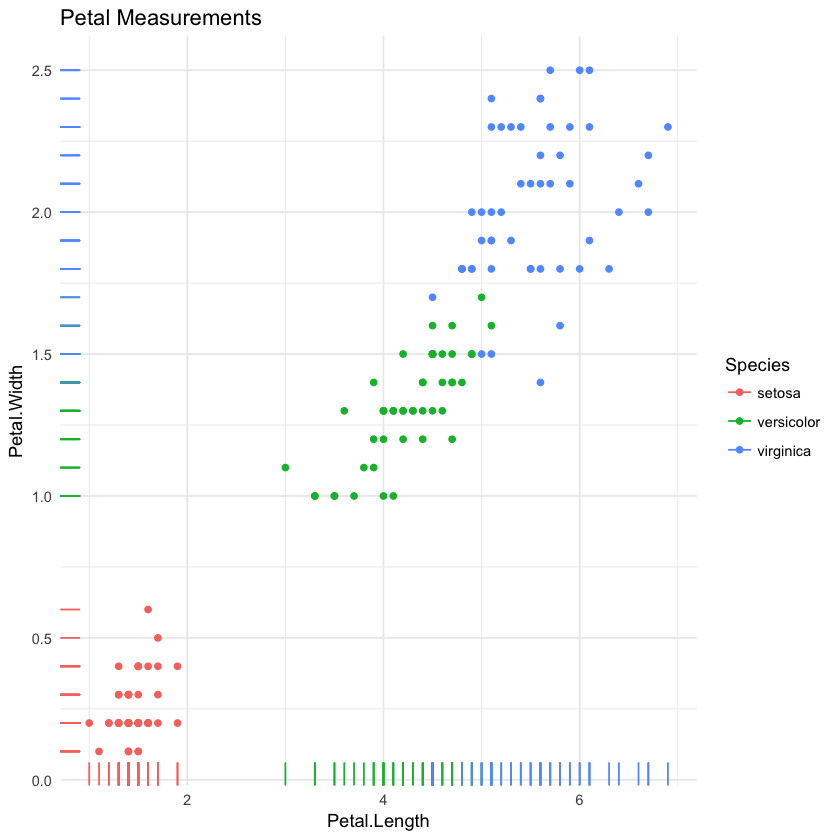

In [4]:
p <- ggplot(data=iris, aes(x=Petal.Length, y=Petal.Width, color=Species))
p + geom_point() + geom_rug()+ theme_minimal() + ggtitle("Petal Measurements")

## `corrplot`
a graphical display of a correlation matrix, confidence interval  

* Display  
There are seven visualization methods: `"circle"`, `"square"`, `"ellipse"`, `"number"`, `"shade"`, `"color"`, `"pie"`.  
> Positive correlations are displayed in <font color="blue">blue</font> and negative correlations in <font color="red">red</font> color.  
**Color intensity** and **the size** of the circle are proportional to the correlation coefficients.

Example:
```R
M <- cor(mtcars) # input must be the result of all correlation coefficients.
corrplot(M, method = "circle")#default method
```

* Layout   
There are three layout types (parameter type): `"full"`: **full** correlation matrix; `"upper"`: **upper** triangular of the correlation matrix; `"lower"`: **lower** triangular of the correlation matrix.

Example:
```R
corrplot(M, type = "full") #default layout
```

* Mixed  
```R
corrplot.mixed(M, lower = "ellipse", upper = "number")
```

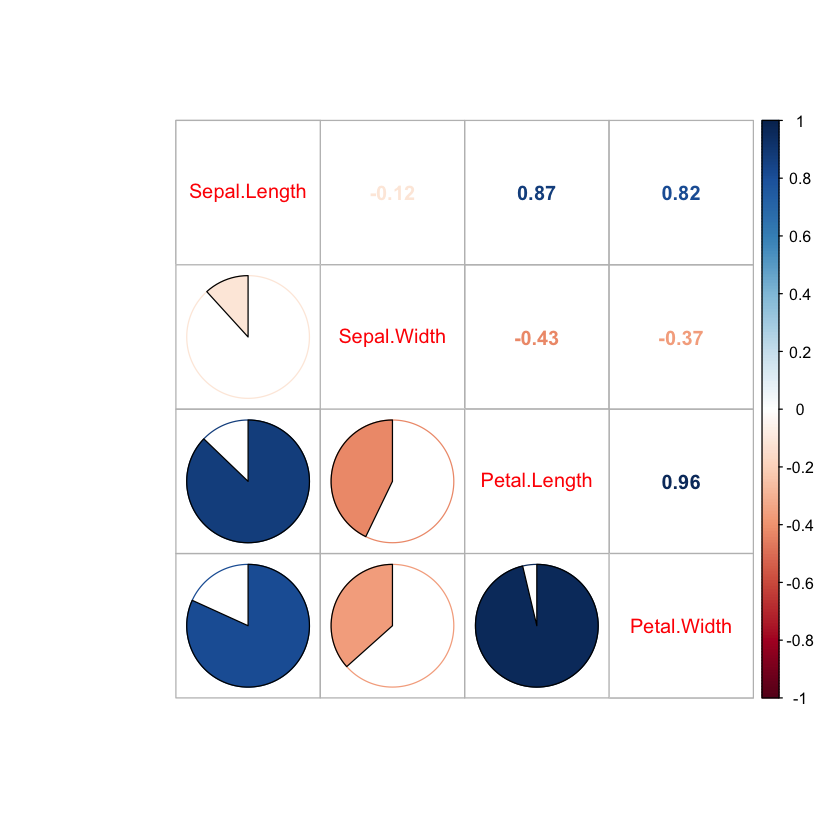

In [5]:
## and this one shows the correlation between the features (input variables)
corrplot.mixed(cor(iris[,-5]), lower="pie", upper="number")

### Training and Testing Sets

`set.seed()` is just for setting parameter for the random generatior.
> Different parameter will yield different random numbers. Due to date are intrinsically various, by using date as parameter can easily avoid using same parameter.

In [7]:
# set random seed
set.seed(2092018)

Using indexing `[]` to extract data: `dataframe[row, col]`
> Example:
`dataframe[1:10,]`: Select row index from 1 to 10, include all the columns.
`dataFrame[,5]`: Select only the 5th column data from all record.

`sample()`: sampling the specified size from the elements of x using either with or without replacement.
> `sample(x, size, replace = FALSE, prob = NULL)`
    a. `x`  a vector of one or more elements from which to choose
    b. `size`: default is the number of items inferred from `x`

In [11]:
# permute iris, shuffle or mix them up
iris <- iris[sample(1:nrow(iris), nrow(iris)),]

In [12]:
# create  training and testing subsets:
train.index = 1:100
train.data <- iris[train.index, -5] # grab the first 100 records, leave out the species (last column 5)
train.label <- iris[train.index, 5] # grab the first 100 records of the species
test.data <- iris[-train.index, -5] # (discard the first 100 record) grab the last 50 records, leave out the species (last column 5)
test.label <- iris[-train.index, 5] # grab the last 50 records of the species

In [13]:
head(iris) # the shuffled records

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
15,5.8,4.0,1.2,0.2,setosa
33,5.2,4.1,1.5,0.1,setosa
4,4.6,3.1,1.5,0.2,setosa
76,6.6,3.0,4.4,1.4,versicolor
9,4.4,2.9,1.4,0.2,setosa
1,5.1,3.5,1.4,0.2,setosa


In [14]:
head(train.data) #without the Species

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
15,5.8,4.0,1.2,0.2
33,5.2,4.1,1.5,0.1
4,4.6,3.1,1.5,0.2
76,6.6,3.0,4.4,1.4
9,4.4,2.9,1.4,0.2
1,5.1,3.5,1.4,0.2


### KNN Classifier

In [15]:
train.len <- nrow(train.data) # 100 records
test.len <- nrow(test.data) # 50 records

`dist()`: computes and returns the distance matrix computed by using the specified distance measure to compute the distances between the rows of a data matrix.
> `dist(x, method = "euclidean", diag = FALSE, upper = FALSE, p = 2)`  
    `x`: numeric matrix.  
    `method`: the distance measure to be used. "euclidean", "maximum", "manhattan", "canberra", "binary" or "minkowski".  

`rbind(...)`: Take a sequence of vector, matrix or data-frame arguments and combine by rows.  
`cbind(...)`: Take a sequence of vector, matrix or data-frame arguments and combine by columns.

### Matrix
`matrix(data, nrow, ncol, byrow, dimnames)`: create a matrix from the given set of values.  
`as.matrix()`: turn its argument into a matrix.  
`is.matrix()`: test if its argument is a (strict) matrix.

In [16]:
temp <- as.matrix(dist(rbind(test.data, train.data), method= 'euclidean'))
dist <- temp[1:test.len, (test.len+1):(test.len + train.len)]

### Majority Vote

In [25]:
# define an auxiliary function that calculates the majority votes (or mode!)
majority <- function(x) {
    # The input x should be a vector
    x_sorted <- sort(x) # need to pre-sort, otherwise get wrong output
    uniqx <- unique(x_sorted) # find all unique element
    cnt <- tabulate(match(x_sorted, uniqx)) # count occurrences
    return(uniqx[which.max(cnt)]) # return the most vote
}

* `match(x, table)`: 返回一个向量，若数据集x中的某数据能在table中找到对应的数据，则返回数据在该table中的序数,否则记为`<NA>`。
例：
```R
match(c("a","b","b","c",4), unique(c("a","b","c")))
> [1] 1 2 2 3 <NA>
```
也可以用 `%in%`来查是否在向量中：
```R
"a" %in% c("a","b")
[1] TRUE
```

* `tabulate()`: 输入一组整数向量并记录每种数字出现的次数，按照输入数据对应的序，返回所有出现次数。
```R
tabulate(match(c("a","b","b","c"), unique(c("a","b","c"))))
[1] 1 2 1 # 对应”a“出现1次，“b”出现2次，“c”出现1次
```

* `which.max()`: 输入数字向量，返回向量中数字最大的序数。
```R
which.max(1:5)
[1] 5
```

In [26]:
# KNN function (distance should be one of euclidean, maximum, manhattan, canberra, binary or minkowski)
knn <- function(train.data, train.label, test.data, K=3, distance = 'euclidean'){
    # count number of train samples
    train.len <- nrow(train.data)
    
    # count number of test samples
    test.len <- nrow(test.data)
    
    # calculate distances between test-data and train-data
    temp <- as.matrix(dist(rbind(test.data, train.data), method= distance))
    dist <- temp[1:test.len, (test.len+1):(test.len + train.len)]
    
    # for each test sample...
    for (i in 1:test.len){
        # find its K nearest neighbours from training sampels...
        sorted_dist_each_row <- sort(dist[i,], index.return = TRUE)
        
        # K nearest data, only extract the index of its data
        nn_index <- as.data.frame(sorted_dist_each_row)[1:K,2]
        
        # assign predicted labels according to the majority vote
        test.label[i] <- majority(train.label[nn_index])
    }
    
    ## return the class labels as output
    return (test.label)
}

In [27]:
# let see what is the prediciton of our knn for test samples when K=4
knn_result <- knn(train.data, train.label, test.data, K=4)

### Table
* `table()`: build a contingency table of the counts at each combination of factor levels.

> **Contingency table**: a table showing the distribution of one variable in rows and another in columns, used to study the correlation between the two variables.

Also:  
`as.table()`:turn its argument into matrix.  
`is.matrix()`: test if its argument is a matrix.

Example
```R
predict_data  <- c("a","a","a","d","w","d")
observed_data <- c("a","a","w","d","w","d")
table(x,y)

    a d w
  a 2 0 1
  d 0 2 0
  w 0 0 1
```

* `prop.table()`: Express Table Entries as Fraction of Marginal Table.

Example:
```R
prop.table(table(predict_data, observed_data))*100 # show result in percentage
            observed_data
predict_data        a        d        w
           a 33.33333  0.00000 16.66667
           d  0.00000 33.33333  0.00000
           w  0.00000  0.00000 16.66667
```

In [68]:
table(knn_result, test.label)

            test.label
knn_result   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         18         1
  virginica       0          1        15

In [69]:
# and a confusion matrix for K = 5
prop.table(table(knn(train.data, train.label, test.data, K=5), test.label))*100

            test.label
             setosa versicolor virginica
  setosa         30          0         0
  versicolor      0         36         2
  virginica       0          2        30

In [85]:
# calculate the train and test missclassification rates for K in 1:100 
# THIS MAY TAKE A FEW MINUTES TO COMPLETE!
miss <- data.frame('K'=1:100, 'train'=rep(0,100), 'test'=rep(0,100)) # empty data.frame
for (k in 1:100){
    train_results = knn(train.data, train.label, train.data, K=k)
    test_results = knn(train.data, train.label, test.data, K=k)
    miss[k,'train'] <- sum(train_results != train.label) / nrow(train.data) * 100 # in percentage
    miss[k,'test']  <- sum(test_results  != test.label)  / nrow(test.data)  * 100 # in percentage
}

### Misclassification percentage

`melt(data, id.vars, )`: convert an object into a molten data frame.  
`names(object)`: get or set the names of an object.

In [86]:
# plot misclassification percentage for train and test data sets
miss.m <- melt(miss, id='K') # reshape for visualization

In [87]:
# Change the column's names
names(miss.m) <- c('K', 'type', 'error')

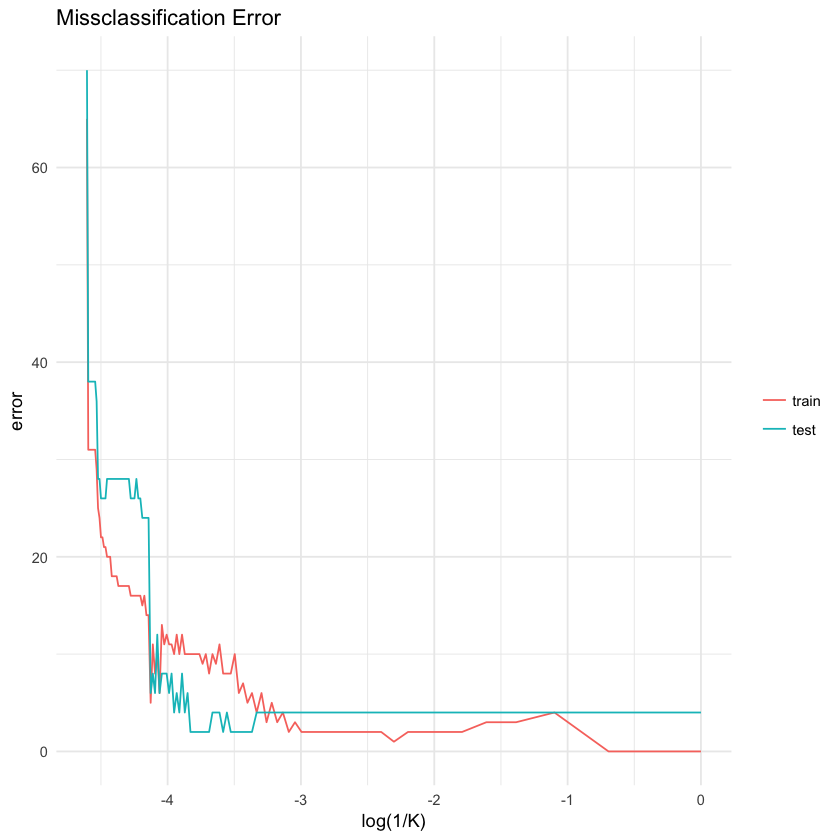

In [90]:
# plot the  
p <- ggplot(data=miss.m, aes(x=log(1/K), y=error, color=type)) + geom_line() 
p + scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() + 
ggtitle("Missclassification Error")

# Discussions

* As $K$ increases, does the complexity of the KNN classifier increase or decrease?  
[Stackoverflow: Why does decreasing K in K-nearest-neighbours increase complexity?](https://stackoverflow.com/a/23991001)


* What is the relationship between $1/K$ and the training error?

* What is the relationship between $1/K$ and the testing error?

* How do you explain the difference between training and testing error trends as the complexity of the KNN classifier increases?

* Can you tell the areas where the model overfits and underfits? What is the best value for $K$?